**Exploring Classification Type Data from https://github.com/salesforce/WikiSQL**

In [6]:
!pip install jsonlines

In [9]:
#Loading Json Train Data
import jsonlines
phase=[]
table_id=[]
question=[]
sql=[]
with jsonlines.open("train.jsonl") as f:
  for line in f.iter():
    phase.append(line['phase'])
    table_id.append(line['table_id'])
    question.append(line['question'])
    sql.append(line['sql'])

In [12]:
import pandas as pd
d={'phase':phase,'table_id':table_id,'question':question,'sql':sql}
train_data=pd.DataFrame(d)
train_data

,phase,table_id,question,sql
0,1,1-1000181-1,Tell me what the notes are for South Australia,"{'sel': 5, 'conds': [[3, 0, 'SOUTH AUSTRALIA']..."
1,1,1-1000181-1,What is the current series where the new serie...,"{'sel': 4, 'conds': [[5, 0, 'New series began ..."
2,1,1-1000181-1,What is the format for South Australia?,"{'sel': 2, 'conds': [[0, 0, 'South Australia']..."
3,1,1-1000181-1,Name the background colour for the Australian ...,"{'sel': 1, 'conds': [[0, 0, 'Australian Capita..."
4,1,1-10007452-3,how many times is the fuel propulsion is cng?,"{'sel': 3, 'conds': [[5, 0, 'CNG']], 'agg': 3}"
...,...,...,...,...
56350,2,2-12200756-16,What time was the match played with a score of...,"{'sel': 1, 'conds': [[5, 0, '3-2']], 'agg': 0}"
56351,2,2-12200756-16,On which ground did the team play Aston Villa?,"{'sel': 4, 'conds': [[3, 0, 'aston villa']], '..."
56352,2,2-12200756-16,What kind of competition was it at San Siro at...,"{'sel': 2, 'conds': [[4, 0, 'san siro'], [1, 0..."
56353,2,2-12214488-1,What is the total number of decile for the red...,"{'sel': 5, 'conds': [[0, 0, 'redwood school']]..."


In [23]:
#Loading Train Table info Data
import jsonlines
id=[]
header=[]
types=[]
rows=[]
with jsonlines.open("train.tables.jsonl") as f:
  for line in f.iter():
    id.append((line['id']))
    header.append((line['header']))
    types.append((line['types']))
    rows.append(line['rows'])

In [24]:
d={'id':id,'header':header,'types':types,'rows':rows}
train_table_info=pd.DataFrame(d)
train_table_info

,id,header,types,rows
0,1-1000181-1,"[State/territory, Text/background colour, Form...","[text, text, text, text, text, text]","[[Australian Capital Territory, blue/white, Ya..."
1,1-10006830-1,"[Aircraft, Description, Max Gross Weight, Tota...","[text, text, text, text, text]","[[Robinson R-22, Light utility helicopter, 1,3..."
2,1-10007452-3,"[Order Year, Manufacturer, Model, Fleet Series...","[text, text, text, text, text, text]","[[1992-93, Gillig, Phantom (High Floor), 444-4..."
3,1-10015132-1,"[Player, No., Nationality, Position, Years in ...","[text, text, text, text, text, text]","[[Quincy Acy, 4, United States, Forward, 2012-..."
4,1-10015132-14,"[Player, No., Nationality, Position, Years in ...","[text, real, text, text, text, text]","[[Patrick O'Bryant, 13, United States, Center,..."
...,...,...,...,...
18580,2-18998832-2,"[Game, Date, Opponent, Venue, Result, Attendance]","[real, text, text, text, text, real]","[[1, 15 August 1987, Swindon Town, Home, 2–0, ..."
18581,2-18998832-5,"[Round (Leg), Date, Opponent, Venue, Result, A...","[text, text, text, text, text, real]","[[2 (1), 22 September 1987, Fulham, Away, 5–1,..."
18582,2-19001175-1,"[Country, Seasons, Championship Titles, Race e...","[text, text, text, text, real, real, real, rea...","[[United Kingdom, 1986, 0, 1, 0, 0, 0, 0, 0], ..."
18583,2-19008019-32,"[!Event, Round, Surface, Winner, Opponent, Res...","[real, text, text, text, text, text]","[[1., Wimbledon, Final, Grass, Roger Federer, ..."


**train_table_info contains information of tables like whats the id, columns headers, datatypes of columns, rows of table**

**train_data contains information like whats the id(to which table this question is associated), question(user's question) and sql(corresponding sql in certain format(format is explained below))**

Format: 
1. SELECT column
2. AGGREGATION: None, MAX, MIN, COUNT, SUM, AVG
3. Number of WHERE conditions: 0, 1, 2, 3
4. WHERE column
5. WHERE OPERATORS: =, <, >
6. WHERE VALUE: a textspan (the beginning and the end position of the span using probability) in the NL question. It depends on both selected where-column and where operators.
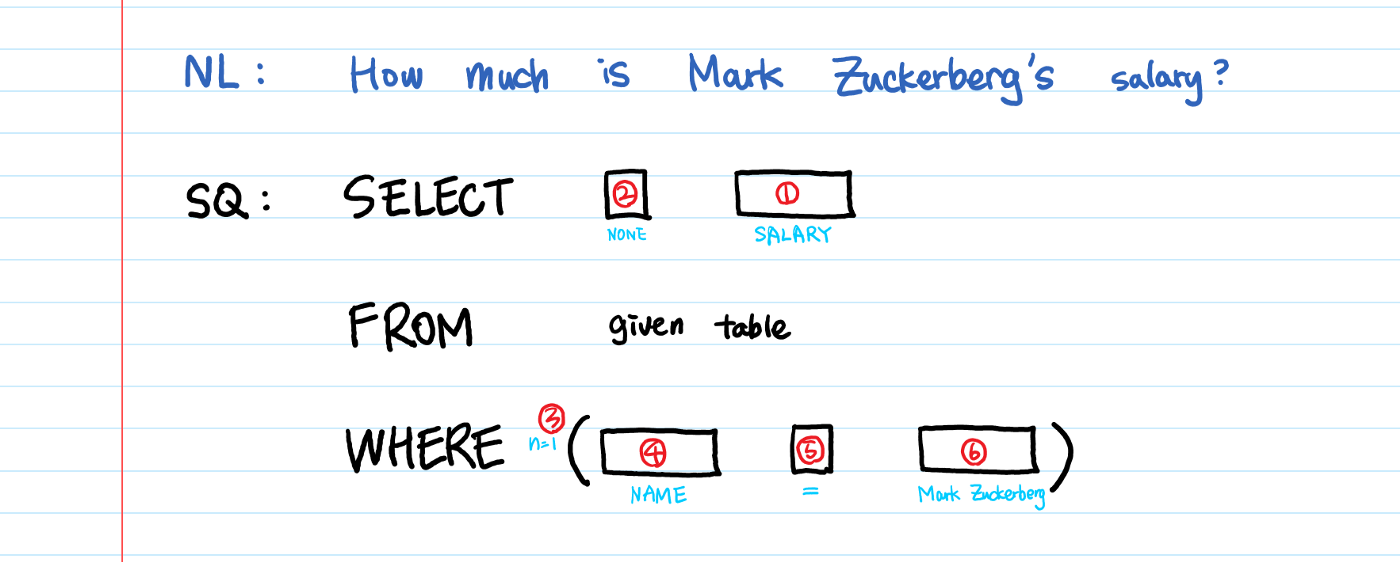

Example 1: 

Table info: {"id": "1-1000181-1", "header": ["State/territory", "Text/background colour", "Format", "Current slogan", "Current series", "Notes"], "types": ["text", "text", "text", "text", "text", "text"], "name": "table_1000181_1"}

Question Info: {"phase": 1, "table_id": "1-1000181-1", "question": "Tell me what the notes are for South Australia ", "sql": {"sel": 5, "conds": [[3, 0, "SOUTH AUSTRALIA"]], "agg": 0}}

So, Answered query for this question is: select 5 th column(Notes) from table_1000181_1 where 3rd Column(Current Slogan) = "South Australia" and aggregation is none. 

So final query will look like:



select Notes from table_1000181_1 where Current Slogan="South Australia"


Example2: 

Table Info: {"header": ["Order Year", "Manufacturer", "Model", "Fleet Series (Quantity)", "Powertrain (Engine/Transmission)", "Fuel Propulsion"], "page_title": "Torrance Transit", "types": ["text", "text", "text", "text", "text", "text"], "id": "1-10007452-3", "section_title": "Fleet", "caption": "Fleet","name": "table_10007452_3"}

Question Info: {"phase": 1, "table_id": "1-10007452-3", "question": "how many times is the fleet series (quantity) is 468-473 (6)?", "sql": {"sel": 0, "conds": [[3, 0, "468-473 (6)"]], "agg": 3}}

Final Query : select count(Order Year) from table_10007452_3 where Fleet Series (Quantity)=468-473 (6) 



************************************************************************************************************************************************

**Exploring Sparc Dataset**

In [36]:
import json
with open("train_spider.json") as f:
  data=json.load(f)

In [43]:
db_id=[]
query=[]
question=[]
for i in data:
  db_id.append(i['db_id'])
  query.append(i['query'])
  question.append(i['question'])

In [44]:
import pandas as pd
d={"db_id":db_id,'query':query,'question':question}
sparc_dataset=pd.DataFrame(d)
sparc_dataset

,db_id,query,question
0,department_management,SELECT count(*) FROM head WHERE age > 56,How many heads of the departments are older th...
1,department_management,"SELECT name , born_state , age FROM head ORD...","List the name, born state and age of the heads..."
2,department_management,"SELECT creation , name , budget_in_billions ...","List the creation year, name and budget of eac..."
3,department_management,"SELECT max(budget_in_billions) , min(budget_i...",What are the maximum and minimum budget of the...
4,department_management,SELECT avg(num_employees) FROM department WHER...,What is the average number of employees of the...
...,...,...,...
6995,culture_company,SELECT T1.company_name FROM culture_company AS...,What are all the company names that have a boo...
6996,culture_company,"SELECT T1.title , T3.book_title FROM movie AS...",Show the movie titles and book titles for all ...
6997,culture_company,"SELECT T1.title , T3.book_title FROM movie AS...",What are the titles of movies and books corres...
6998,culture_company,SELECT T2.company_name FROM movie AS T1 JOIN c...,Show all company names with a movie directed i...


In [45]:
import json
with open("tables.json") as f:
  data=json.load(f)

In [50]:
column_names=[]
column_names_original=[]
column_types=[]
db_id=[]
foreign_keys=[]
primary_keys=[]
table_names=[]
table_names_original=[]
for i in data:
  column_names.append(i['column_names'])
  column_names_original.append(i['column_names_original'])
  column_types.append(i['column_types'])
  db_id.append(i['db_id'])
  foreign_keys.append(i['foreign_keys'])
  primary_keys.append(i['primary_keys'])
  table_names.append(i['table_names'])
  table_names_original.append(i['table_names_original'])

d={'column_names':column_names,'column_names_original':column_names_original,'column_types':column_types,'db_id':db_id,'foreign_keys':foreign_keys,'primary_keys':primary_keys,'table_names':table_names,'table_names_original':table_names_original}
sparc_tables_data=pd.DataFrame(d)
sparc_tables_data

,column_names,column_names_original,column_types,db_id,foreign_keys,primary_keys,table_names,table_names_original
0,"[[-1, *], [0, perpetrator id], [0, people id],...","[[-1, *], [0, Perpetrator_ID], [0, People_ID],...","[text, number, number, text, number, text, tex...",perpetrator,"[[2, 9]]","[1, 9]","[perpetrator, people]","[perpetrator, people]"
1,"[[-1, *], [0, building], [0, room number], [0,...","[[-1, *], [0, building], [0, room_number], [0,...","[text, text, text, number, text, text, number,...",college_2,"[[9, 4], [13, 4], [19, 1], [20, 2], [15, 7], [...","[1, 4, 7, 11, 15, 22, 27, 31, 37, 39, 45]","[classroom, department, course, instructor, se...","[classroom, department, course, instructor, se..."
2,"[[-1, *], [0, id], [0, city], [0, country], [0...","[[-1, *], [0, id], [0, City], [0, Country], [0...","[text, number, text, text, text, text, text, n...",flight_company,"[[20, 7], [19, 1]]","[1, 7, 13]","[airport, operate company, flight]","[airport, operate_company, flight]"
3,"[[-1, *], [0, institution id], [0, name], [0, ...","[[-1, *], [0, instID], [0, name], [0, country]...","[text, number, text, text, number, text, text,...",icfp_1,"[[11, 7], [10, 1], [9, 4]]","[1, 4, 7, 9]","[institution, authors, papers, authorship count]","[Inst, Authors, Papers, Authorship]"
4,"[[-1, *], [0, body builder id], [0, people id]...","[[-1, *], [0, Body_Builder_ID], [0, People_ID]...","[text, number, number, number, number, number,...",body_builder,"[[2, 6]]","[1, 6]","[body builder, people]","[body_builder, people]"
...,...,...,...,...,...,...,...,...
161,"[[-1, *], [0, employee ssn], [0, project numbe...","[[-1, *], [0, Essn], [0, Pno], [0, Hours], [1,...","[text, number, number, number, text, text, tex...",company_1,[],"[1, 7, 15, 19, 22, 27]","[works on, employee, department, project, depe...","[works_on, employee, department, project, depe..."
162,"[[-1, *], [0, workshop id], [0, date], [0, ven...","[[-1, *], [0, Workshop_ID], [0, Date], [0, Ven...","[text, number, text, text, text, number, numbe...",workshop_paper,"[[10, 1], [9, 5]]","[1, 5, 9]","[workshop, submission, acceptance]","[workshop, submission, Acceptance]"
163,"[[-1, *], [0, item id], [0, title], [1, a id],...","[[-1, *], [0, i_id], [0, title], [1, a_id], [1...","[text, number, text, number, number, number, n...",epinions_1,"[[5, 1], [4, 8], [11, 8], [10, 8]]","[1, 3, 8]","[item, review, useracct, trust]","[item, review, useracct, trust]"
164,"[[-1, *], [0, party id], [0, party theme], [0,...","[[-1, *], [0, Party_ID], [0, Party_Theme], [0,...","[text, number, text, text, text, text, number,...",party_host,"[[11, 1], [12, 7]]","[1, 7, 11]","[party, host, party host]","[party, host, party_host]"


Sparc Dataset has text questions to corresponding text sql query. Each database has many tables that are related by some foreign key.